---
## Fonksiyonlarda Kapsam (scope) ve `global` Deyimi


Python'da, fonksiyonlar ve değişkenler kendi kapsamlarına (scope) sahiptir. Bu kavram, bir değişkenin nerede ve nasıl erişilebilir olduğunu tanımlar. Python'da iki ana değişken türü vardır: lokal ve global değişkenler.

**Lokal Değişkenler:**
Bir fonksiyonun içinde tanımlanan ve yalnızca o fonksiyonun içinde erişilebilen değişkenlerdir.

Örnek:

In [1]:
def my_function():
    local_variable = 2  # Bu bir lokal değişkendir
    return local_variable

Diyelim ki, programımızın başında `a` adında bir değişken tanımladık:

In [2]:
a = 0

def ornek_fonksiyon():
    a = 2
    print("Fonksiyon içindeki a:", a)

ornek_fonksiyon()
print("Fonksiyon dışındaki a:", a)

Fonksiyon içindeki a: 2
Fonksiyon dışındaki a: 0


Benzer şekilde aşağıdaki gibi yazabiliriz.

In [3]:
a = 0

def ornek_fonksiyon():
    a = 2
    return a

print("Fonksiyon içindeki a:", ornek_fonksiyon())
print("Fonksiyon dışındaki a:", a)

Fonksiyon içindeki a: 2
Fonksiyon dışındaki a: 0


Bu kod parçası çalıştırıldığında, çıktı şu şekilde olur:

```
Fonksiyon içindeki a: 10
Fonksiyon dışındaki a: 5
```

Gördüğünüz gibi, fonksiyon içindeki `a` değişkeni ile fonksiyon dışındaki `a` değişkeni birbirinden farklıdır. Fonksiyon içindeki `a`, yalnızca fonksiyonun kapsamı içinde geçerlidir ve bu kapsam dışında, yani fonksiyon dışında bir etkisi yoktur. Yani yukarıdaki kod parçası çalıştırıldığında, fonksiyon içindeki ve dışındaki `a` değişkenlerinin farklı olduğunu görebiliriz: fonksiyon içindeki değer 2'ye eşitken, global alandaki değer 0 olarak kalır.

Bu, Python'da **'isim alanı' (namespace)** kavramı ile açıklanır. Her değişken bir isim alanında yaşar: ya global alanda ya da bir fonksiyonun yerel kapsamında.

Örnek:

In [4]:
numbers = []

def add_number():
    numbers.append(5)
    return numbers

add_number()
print('numbers listesinin son hali:', numbers)

numbers listesinin son hali: [5]


Bu örnekte, bir listeye eleman ekleyen bir fonksiyonumuz var. Python'da listeler değiştirilebilir (mutable) nesneler oldukları için, fonksiyon içinde yaptığımız değişiklik global listeyi de etkiler.

Ancak, bir değişkenin değerini değiştirmek ve yeni bir değer atamak arasında önemli bir fark vardır. Yerel kapsamdaki bir değişkenin değerini değiştirmek istiyorsak ve bu değişken global alanda tanımlanmışsa, bu durumda `global` anahtar kelimesini kullanmamız gerekir.


**Global Değişkenler:**
Bu değişkenler fonksiyonların dışında tanımlanır ve programın her yerinden erişilebilir. Ancak, bir fonksiyonun içinden global bir değişkenin değerini doğrudan değiştirmek mümkün değildir, bunun için `global` anahtar kelimesini kullanmamız gerekir.

**Global Anahtar Kelimesi Kullanımı:**

`global` anahtar kelimesi, bir fonksiyonun içinde global değişkenlerle çalışmak istediğimizde kullanılır. Böylece, fonksiyon içinde bir değişkenin global olduğunu belirtebiliriz.

Örnek:

In [5]:
name = 'Ahmet' # Bu bir global değişkendir

def update_name():
    global name # global anahtar kelimesi ile name'i global olarak işaretliyoruz
    name += ' Yılmaz' # Şimdi global değişkeni güncelleyebiliriz
    return name

update_name()
print(name)  # name artık Ahmet Yılmaz olacaktır

Ahmet Yılmaz


Burada, `global` anahtar kelimesi kullanarak `name` değişkeninin global versiyonuna erişiyor ve onu güncelliyoruz. Bu, `name` değişkeninin global değerini 'Ahmet Yılmaz' olarak değiştirir.

Örnek:

In [6]:
a = 0

def ornek_fonksiyon():
    global a
    a = 2
    print("Fonksiyon içindeki a (global):", a)

ornek_fonksiyon()
print("Fonksiyon dışındaki a (global):", a)

Fonksiyon içindeki a (global): 2
Fonksiyon dışındaki a (global): 2


Bu durumda, çıktımız şu şekilde olacaktır:

```
Fonksiyon içindeki a (global): 2
Fonksiyon dışındaki a (global): 2
```

`global` deyimi sayesinde, fonksiyon içinde `a` değişkenine atanan değer, fonksiyon dışındaki global `a` değişkenini de etkilemiş oldu.

### `if`, `elif`, `while` Bloklarında Değişkenler:

Python'da, `if`, `elif`, `while` gibi kontrol yapılarının içinde tanımlanan değişkenler teknik olarak global kapsamda kabul edilir eğer bu yapılar herhangi bir fonksiyonun içinde tanımlanmamışsa. Bu, bu blokların içinde oluşturulan değişkenlerin, bu blokların tanımlandığı aynı kapsamda (genellikle global) erişilebilir olduğu anlamına gelir.

In [7]:
x = 10  # Global değişken

if x > 5:
    y = 20  # Bu değişken de globaldir çünkü fonksiyon içinde değil.
    print("x, 5'ten büyük.")

while x > 0:
    z = x - 5  # Bu değişken de globaldir çünkü fonksiyon içinde değil.
    x -= 1

print(y)  # 20 değerini yazdırır.
print(z)  # Son değerini yazdırır, çünkü z global kapsamda.

x, 5'ten büyük.
20
-4


Ancak, eğer bu ifadeler bir fonksiyonun içinde tanımlanmış olsaydı, `y` ve `z` değişkenleri o fonksiyonun lokal kapsamında olurdu ve sadece o fonksiyon içinden erişilebilir olurdu.

### Not:

- Fonksiyonlar içinde tanımlanan değişkenler her zaman o fonksiyonun local kapsamına aittir.
- Python'da, bir değişkenin global veya lokal olup olmadığını kontrol etmek için `global` ve `nonlocal` anahtar kelimeleri kullanılabilir, ancak bu kullanımlar dikkatli bir şekilde yapılmalıdır.

**Global Kullanımının Dezavantajları:**

`global` deyimi kullanışlı olabilir ancak dikkatli kullanılması gerekir. Global değişkenlerin fonksiyonlar arasında aşırı kullanımı, kodun anlaşılmasını ve bakımını zorlaştırabilir. Ayrıca, global değişkenlerin beklenmedik şekillerde değiştirilmesi, hatalara ve veri bütünlüğü sorunlarına yol açabilir. Bu yüzden, global değişken kullanımını mümkün olduğunca sınırlamak ve daha modüler ve bağımsız fonksiyonlar yazmak genellikle daha iyi bir uygulamadır.

---

## Lambda Fonksiyonları

Python'da lambda fonksiyonları ve normal (veya adlandırılmış) fonksiyonlar arasında bazı önemli farklar bulunmaktadır. Bu farkları anlamak, hangi durumlarda hangi tip fonksiyonun kullanılacağını belirlemenize yardımcı olacaktır.

Lambda fonksiyonlarının genel yapısı şu şekildedir:

```python
lambda parametreler: ifade
```

Lambda fonksiyonları, genellikle `map()`, `filter()`, ve `reduce()` gibi yüksek seviye fonksiyonlarla birlikte kullanılır.


**1. Tanımlama ve Sözdizimi:**

- **Normal Fonksiyonlar:** `def` anahtar kelimesi ile tanımlanır, isimlendirilmiş bir blok şeklinde gelir ve çok sayıda ifade içerebilir. Bu fonksiyonlar birden fazla satır içerebilir ve karmaşık işlemler gerçekleştirebilir.

Örnek:

In [8]:
def kare_al(x):
  return x * x

In [9]:
def kare_al(x):return x * x

- **Lambda Fonksiyonları:** `lambda` anahtar kelimesi ile tanımlanır, isimsizdir (anonimdir) ve yalnızca tek bir ifade içerir. Bu ifade otomatik olarak döndürülür. Lambda fonksiyonları genellikle kısa ve basit işlemler için kullanılır.

Örnek:

In [10]:
kare_al = lambda x: x * x

**2. Çok Satırlı Kod:**

- **Normal Fonksiyonlar:** Birden fazla satır içerebilirler, bu da onları daha karmaşık işlemler için uygun kılar.
Örnek:

In [11]:
def toplam_ve_fark(x, y):
    toplam = x + y
    fark = x - y
    return toplam, fark

- **Lambda Fonksiyonları:** Yalnızca tek bir ifade içerebilirler. Bu, onların kullanımını daha basit işlemlerle sınırlar.
Örnek:

In [12]:
toplam = lambda x, y: x + y
fark = lambda x, y: x - y


**3. İsimlendirme ve Yeniden Kullanım:**

- **Normal Fonksiyonlar:** İsimlendirilirler, bu da kodun daha okunabilir olmasını sağlar ve fonksiyonun kodun farklı bölümlerinde yeniden kullanılmasına olanak tanır.

- **Lambda Fonksiyonları:** İsimsizdirler ve genellikle tek seferlik kullanım için tasarlanmışlardır. Ancak, bir değişkene atanarak birden çok kez kullanılabilirler.


Örnek: Kullanıcı adını alıp selamlama mesajı döndüren bir fonksiyon düşünelim.

- **Normal Fonksiyon:**

In [13]:
def selamlama(isim):
    return f"Merhaba, {isim}!"

In [14]:
selamlama('Mehmet')

'Merhaba, Mehmet!'


- **Lambda Fonksiyon:**


In [15]:
selam_ver = lambda isim: f"Merhaba, {isim}!"

In [16]:
selam_ver('Ahmet')

'Merhaba, Ahmet!'

Her iki fonksiyon da benzer işlevi görür, ancak normal fonksiyon daha açıklayıcı olabilir ve daha karmaşık işlemler için genişletilebilirken, lambda fonksiyonu daha kısa ve basit işlemler için daha uygun olabilir.

---
### Lambda fonksiyonları ile koşullu ifadeler

Lambda fonksiyonları içerisinde birden fazla koşullu ifade (conditional expression) kullanabilirsiniz. Ancak, bu ifadelerin okunabilirliğini ve anlaşılırlığını korumak önemlidir, çünkü lambda fonksiyonları genellikle kısa ve basit işlemler için tasarlanmıştır. Çok karmaşık ifadeler lambda fonksiyonları içerisinde zor anlaşılır hale gelebilir.

İki koşullu ifadeyi aynı lambda içinde kullanmanın bir yolu, `if-elif-else` mantığını `if-else` zincirleriyle simüle etmektir. Python'da lambda içinde doğrudan `elif` **kullanamazsınız**, ancak `if-else` ifadelerini iç içe geçirerek benzer bir mantık oluşturabilirsiniz.

Aşağıda, iki koşullu ifade kullanılan bir lambda fonksiyonunun örneğini bulabilirsiniz:

Lambda fonksiyonları içerisinde koşullu ifadeler (conditional expressions) kullanarak, belirli koşullara bağlı olarak farklı sonuçlar üretebilirsiniz. Bu koşullu ifadeler, genellikle `if-else` yapısı şeklinde tanımlanır ve lambda fonksiyonunun tek satırında bulunurlar.

**1. Tek Koşullu İfade Örneği:**
Örnek: Girilen iki sayıdan büyük olanı döndüren lambda fonksiyonu:


In [17]:
maksimum = lambda x, y: x if x > y else y
print(maksimum(8,5))

8


Örnek: Sayının pozitif, negatif ya da sıfır olduğunu kontrol eden bir lambda fonksiyonu:

In [18]:
kontrol_et = lambda x: "Pozitif" if x > 0 else ("Negatif" if x < 0 else "Sıfır")
print(kontrol_et(10))
print(kontrol_et(-5))
print(kontrol_et(0))

Pozitif
Negatif
Sıfır




**2. Liste Elemanlarını Filtreleme Örneği:**

Bir listenin elemanlarını, belirli bir koşula göre filtrelemek ve dönüştürmek için koşullu bir lambda fonksiyonu:

In [19]:
sayilar = [3, -4, 2, -7, 8, -2, 4]
# Pozitif sayıları al ve karelerini al, negatif sayıları sıfıra dönüştür.
düzeltilmiş = list(map(lambda x: x ** 2 if x > 0 else 0, sayilar))
print(düzeltilmiş)  # Çıktı: [9, 0, 4, 0, 64, 0, 16]

[9, 0, 4, 0, 64, 0, 16]




**3. Sıralama Kriteri Olarak Koşullu İfade Örneği:**

Bir liste içerisindeki dizeleri, uzunluğuna ve alfabetik sırasına göre sıralamak için kullanılan bir lambda fonksiyonu:

In [20]:
kelimeler = ["elma", "armut", "muz", "çilek", "ananas"]
# Önce kelime uzunluğuna göre, sonra alfabetik sıraya göre sırala.
kelimeler_sirali = sorted(kelimeler, key=lambda x: (len(x), x))
print(kelimeler_sirali)  # Çıktı: ['muz', 'elma', 'armut', 'çilek', 'ananas']

['muz', 'elma', 'armut', 'çilek', 'ananas']


Bu kod parçası, Python'daki `sorted()` fonksiyonunun kullanımını göstermektedir. `sorted()` fonksiyonu, verilen bir diziyi (bu durumda bir kelime listesi) belirli bir kritere göre sıralamak için kullanılır. Bu örnekte, sıralama iki kritere dayanmaktadır: kelime uzunlukları ve alfabetik sıra. Bu kriterler, lambda fonksiyonu ile belirlenir.

- `sorted()`: Bu, Python'da bir listeyi sıralamak için kullanılan yerleşik bir fonksiyondur. `sorted()` fonksiyonu, sıralanacak olan orijinal listeyi değiştirmez, bunun yerine sıralı bir liste kopyası döndürür.

- `key`: `sorted()` fonksiyonunun `key` parametresi, sıralama kriterini belirlemek için kullanılır. Bu parametre genellikle bir fonksiyon alır ve bu fonksiyon sıralama sırasında her bir eleman için hangi değerin kullanılacağını belirler. Burada, `key=lambda x: (len(x), x)` şeklinde bir lambda fonksiyonu kullanılmaktadır.

- `lambda x: (len(x), x)`: Bu lambda fonksiyonu, `sorted()` fonksiyonuna her bir kelimenin sıralama kriteri olarak ne kullanılacağını söyler. Burada `x`, listeyi dolaşırken karşılaşılan her bir kelimeyi temsil eder. Lambda fonksiyonu, her kelime için bir tuple (demet) döndürür; bu tuple'ın ilk elemanı kelimenin uzunluğu (`len(x)`), ikinci elemanı ise kelimenin kendisidir (`x`). Bu demet, Python'un önce ilk elemana göre (kelime uzunluğuna göre) ve eşit uzunluktaki kelimeler için ikinci elemana göre (alfabetik sıraya göre) sıralama yapmasını sağlar.




Bu örneklerde görebileceğiniz gibi, lambda fonksiyonları içerisindeki koşullu ifadeler, oldukça esnek ve güçlü araçlar sağlarlar. Bu sayede tek satırlık ifadelerle bile oldukça karmaşık mantıklar uygulanabilir.

---
## **map() Fonksiyonu:**

Python'da, `map()` fonksiyonu, belirli bir işlevi bir dizi üzerinde (liste, demet gibi) uygulayarak sonuçları bir map nesnesi olarak döndüren yerleşik bir özelliktir. Bu fonksiyon, ilk parametre olarak bir fonksiyon nesnesi alır (Python'da fonksiyonlar nesne olarak ele alındığı için, başka bir fonksiyona argüman olarak geçirilebilirler). İkinci ve sonraki parametreler olarak, sağlanan fonksiyonun her bir eleman üzerinde uygulanacağı bir veya daha fazla yinelenebilir (iterable) nesne alır.

`map()` fonksiyonunun genel yapısı aşağıdaki gibidir:

```python
map(fonksiyon, iterasyon yapılabilecek veritipleri(liste,demet vb),....)
 ```

In [21]:
def kare_al(x):
  return x ** 2

In [22]:
x=5
kare_al(x)

25

In [23]:
# sayilar = [1, 2, 3]
# kare_al(sayilar) # hata verir

In [24]:
sayilar = [1, 2, 3]
map(kare_al, sayilar)

`map()` fonksiyonu, belirli bir fonksiyonu bir dizi veya listedeki her bir öğe üzerinde uygulamak için kullanılır. Ancak, map() fonksiyonunun kendisi hemen bir liste döndürmez; bunun yerine, `<map at 0x ...` gibi bir map nesnesi oluşturur. Bu nesne, üzerinde yineleme yapılabilecek bir nesnedir (iterable), ancak değerlerini doğrudan göstermez.

`map()` fonksiyonu tarafından oluşturulan nesneyi bir listeye dönüştürerek, dönüştürülen nesnenin tüm öğelerine hemen erişebiliriz,

In [25]:
list(map(kare_al, sayilar))

[1, 4, 9]

`map()` fonksiyonu tarafından oluşturulan map nesnesi üzerinde doğrudan `for` yineleme (iterasyon) yapabiliriz,


In [26]:
for i in map(kare_al, sayilar):
  print(i)

1
4
9


Python'da, `map()` fonksiyonu kullanılarak oluşturulan sonuçları doğrudan yazdırmak istiyorsanız, `print()` fonksiyonunu ve yıldız işareti (`*`) operatörünü kullanabilirsiniz. Yıldız işareti, Python'da argüman paket açma (argument unpacking) olarak bilinen bir özelliği temsil eder. Bu, esasen bir diziyi veya yinelenebilir bir nesneyi, fonksiyona birden fazla bağımsız argüman olarak geçirmenizi sağlar.

`map()` fonksiyonu ile birlikte kullanıldığında, yıldız işareti (`*`) operatörü, `map()` tarafından döndürülen her bir elemanı ayrı bir argüman olarak `print()` fonksiyonuna geçirir. Bu, `map()` fonksiyonunun sonuçlarının her birini yeni bir satır yerine aynı satırda ve aralarında bir boşluk olacak şekilde yazdırır. Bu, özellikle sonuçları hızlı bir şekilde ve kolay bir formatla görmek istediğinizde kullanışlıdır.


In [27]:
print(*map(kare_al, sayilar))

1 4 9


1. **Tek Yinelenebilir Örnek**: `sayilar = [1, 2, 3]` adında bir liste ve her bir sayının karesini almak istiyoruz. Bu durumda `map()` fonksiyonunu aşağıdaki gibi kullanabiliriz:

In [28]:
kareler = list(map(lambda x: x ** 2, sayilar))
kareler

[1, 4, 9]

2. **Çoklu Yinelenebilir Örnek**: `map()` fonksiyonu birden fazla yinelenebilir üzerinde de çalışabilir. Üç liste verildiğinde:

In [29]:
liste1 = [1, 2, 3, 4]
liste2 = [5, 6, 7, 8]
liste3 = [9, 10, 11, 12]

 Bu listelerin karşılık gelen elemanlarını çarpmak istiyorsak, `map()` fonksiyonunu bir lambda fonksiyonu ile kullanabiliriz:

In [30]:
sonuc = list(map(lambda x, y, z: x * y * z, liste1, liste2, liste3))
sonuc

[45, 120, 231, 384]

sonuc `[1*5*9, 2*6*10, 3*7*11, 4*8*12]` şeklinde bire bir çarpma ile `[45, 120, 231, 384]` olmaktadır.

---
## **`filter()` Fonksiyonu:**

`filter()` fonksiyonu, belirli bir koşulu karşılayan elemanları bir yinelenebilirden (iterable) seçmek için kullanılır. Bu fonksiyon, bir yinelenebilirin her bir elemanını belirli bir kriterle süzgeçten geçirir ve bu kriteri sağlayan elemanları içeren bir `filter` nesnesi döndürür.

### `filter()` Fonksiyonunun Yapısı:
`filter()` fonksiyonunun genel kullanımı aşağıdaki gibidir:

```python
filter(fonksiyon, yinelenebilir)
```

Burada, `fonksiyon` parametresi, her eleman üzerinde uygulanacak ve **boolean** bir değer (True veya False) döndürecek bir fonksiyondur. `yinelenebilir` ise, liste, demet veya herhangi bir yinelenebilir yapıdır.

### `filter()` Fonksiyonu ile Örnekler:
1. **Çift Sayıları Filtreleme**:

In [36]:
sayilar = [1, 2, 3, 4, 5, 6]
cift_sayilar = list(filter(lambda x: x % 2 == 0, sayilar))
cift_sayilar

[2, 4, 6]

  Bu örnekte, `lambda` fonksiyonu kullanılarak, verilen listenin elemanlarından yalnızca çift olanlar filtrelendirilir. Sonuç olarak, `[2, 4, 6]` listesi elde edilir.

2. **Asal Sayıları Bulma**:

In [55]:
def asal_mi(x): # for ile çözüm
    if x < 2:
        return False
    for i in range(2, x):
        if x % i == 0:
            return False
    return True

asal_sayilar = list(filter(asal_mi, range(1, 100)))
print(asal_sayilar)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [61]:
def asal_mi2(x): # while ile çözüm
    i=2
    if x < 2:
        return False
    else:
       while i < x:
          if x % i == 0:
           return False
          i += 1
    return True

In [62]:
asal_sayilar2 = list(filter(asal_mi2, range(1, 100)))
print(asal_sayilar2)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


Bu örnekte, `asal_mi` adlı fonksiyon, bir sayının asal olup olmadığını kontrol eder. `filter()` fonksiyonu, bu kontrol fonksiyonunu 1'den 100'e kadar olan sayılara uygular ve yalnızca asal sayıları içeren bir liste döndürür.

---
## **`reduce()` Fonksiyonu:**

`reduce()` fonksiyonu, bir dizi veya listenin elemanlarına ardışık olarak bir işlev uygulamak ve sonuç olarak tek bir değer elde etmek için kullanılır. Bu işlevsellik, özellikle bir veri kümesinin birikimli bir sonucunu hesaplarken yararlıdır. `reduce()` Python 3 itibarıyla artık bir yerleşik fonksiyon değildir ve `functools` modülünden alınması gerekmektedir.

### `reduce()` Fonksiyonunun Temel Kullanımı:
`reduce()` fonksiyonunun temel yapısı şöyledir:

```python
reduce(fonksiyon, iterasyon yapılabilecek veritipi(liste,demet vb))
```

Burada `fonksiyon`, iki argüman alır ve yinelenebilir bir nesne olan `yinelenebilir` üzerinde ardışık uygulanır.

### `reduce()` İşleyişinin Aşamaları:
1. `reduce()` fonksiyonu, yinelenebilir nesnenin ilk iki elemanını alır ve bu elemanlara verilen fonksiyonu uygular.
2. Ardından, elde edilen ilk sonuç ile sonraki eleman fonksiyona tekrar argüman olarak verilir.
3. Bu işlem, yinelenebilir nesnenin tüm elemanları tükenene kadar devam eder.
4. Sonunda, `reduce()` fonksiyonu tek bir değer döndürür.

### Örnekler:
1. **Toplama İşlemi**:

In [33]:
from functools import reduce
sonuc = reduce(lambda x, y: x + y, [1, 2, 3, 4])
sonuc

10

Bu örnekte, `reduce()` fonksiyonu, lambda fonksiyonu ile birlikte kullanılarak, `sayilar` listesinin tüm elemanlarını sırayla toplar. İlk adımda, 1 ve 2 toplanır (sonuç 3 olur), sonra bu sonuç (3) ile sonraki eleman (3) toplanır (sonuç 6 olur), ardından bu işlem bir sonraki elemanla (4) devam eder ve sonuç 10 olur. Bu işlem, listenin son elemanına kadar devam eder. Sonuç olarak, tüm sayıların toplamı olan 10 elde edilir. Yani `[1, 2, 3, 4]` listesinin elemanları toplanarak listenin toplamı (10) hesaplanmış olur.

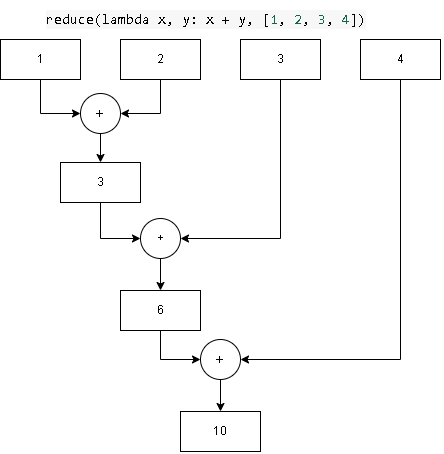


2. **Faktöriyel Hesaplama**: `reduce()` fonksiyonunu kullanarak bir liste içindeki tüm sayıların çarpımını bulalım

In [34]:
faktoriyel = reduce(lambda x, y: x * y, [1, 2, 3, 4])
faktoriyel

24

 Bu örnekte, `reduce()` fonksiyonu, lambda fonksiyonu ile birlikte kullanılarak, `sayilar` listesinin tüm elemanlarını sırayla çarpar. İlk adımda, `1` ve `2` çarpılır (sonuç `2` olur), sonra bu sonuç (`2`) ile sonraki eleman (`3`) çarpılır (sonuç `6` olur), bu işlem liste bitene kadar devam eder. Sonuç olarak, tüm sayıların çarpımı olan `24` elde edilir.  Yani `[1, 2, 3, 4]` listesinin elemanları çarpılarak 4'ün faktöriyeli (24) hesaplanmış olur.

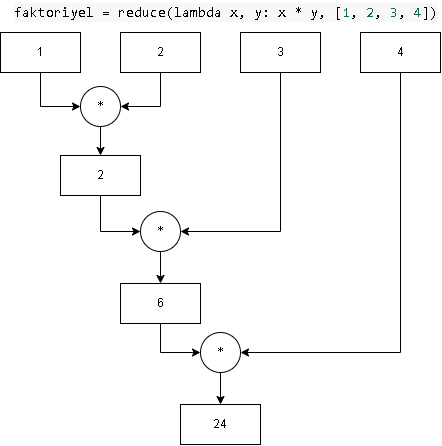

3. **Maksimum Değerin Bulunması**:

In [35]:
def maksimum(x, y):
       return x if x > y else y
maks_deger = reduce(maksimum, [-5, 0, 76, 13])
maks_deger

76

Bu örnekte, `reduce()` fonksiyonu `maksimum` adında tanımlanmış bir kullanıcı tanımlı fonksiyon ile kullanılır. Bu fonksiyon, verilen iki sayıdan büyük olanını döndürür. İşlem, listenin elemanları üzerinden sırayla gerçekleştirilir ve her adımda, o anki maksimum değer bir sonraki eleman ile karşılaştırılır.

İlk adımda, `-5` ve `0` karşılaştırılır; `0`, bu iki değer arasında daha büyüktür. Ardından, bu sonuç (`0`) ile bir sonraki eleman (`76`) karşılaştırılır ve `76`, daha büyük olanıdır. Bu süreç, liste boyunca devam eder. Son adımda, `76` ile `13` karşılaştırılır ve `76`, daha büyük olanıdır. Bu nedenle, `reduce()` fonksiyonunun sonucu olarak `76` elde edilir.

Sonuç olarak, `[-5, 0, 76, 13]` listesindeki en büyük değer olan `76`, `reduce()` ve `maksimum` fonksiyonları kullanılarak hesaplanmış olur.

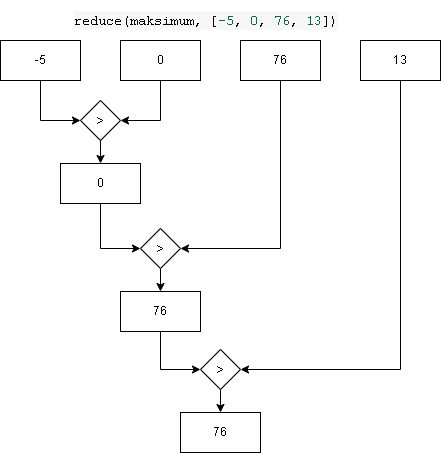